In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
weather = pd.read_csv('./fullweather.csv')

In [3]:
weather

,Local time in Jeju (airport),T,WW,H,I
0,2019-04-16 0:00,11.7,NaN,47,NaN
1,2019-04-16 1:00,11.6,NaN,46,NaN
2,2019-04-16 2:00,11.4,NaN,46,NaN
3,2019-04-16 3:00,11.4,NaN,45,NaN
4,2019-04-16 4:00,11.1,NaN,44,NaN
...,...,...,...,...,...
20587,2021-08-20 19:00,29.3,NaN,63,0.14
20588,2021-08-20 20:00,28.3,NaN,69,0.00
20589,2021-08-20 21:00,27.7,NaN,74,NaN
20590,2021-08-20 22:00,27.5,NaN,74,NaN


In [4]:
weather['Local time in Jeju (airport)'] = pd.to_datetime(weather['Local time in Jeju (airport)'], format='%Y-%m-%d %H:%M', errors='raise')
weather['Date'] = weather['Local time in Jeju (airport)'].dt.date
weather['WW'][weather['WW'].notnull()] = 1
weather['WW'][weather['WW'].isnull()] = 0
weather['WW'] = pd.to_numeric(weather['WW'])


C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
temp_rain = weather.groupby('Date',as_index=False).mean()
temp_rain.rename(columns={'WW':'rain'},inplace=True)
temp_rain['Date'] = temp_rain['Date'].astype(str)

In [6]:
temp_rain

,Date,T,rain,H,I
0,2019-04-16,16.479167,0.000000,45.375000,1.387857
1,2019-04-17,16.054167,0.000000,71.125000,1.531429
2,2019-04-18,16.487500,0.000000,69.833333,1.858571
3,2019-04-19,16.958333,0.000000,75.125000,1.698571
4,2019-04-20,17.125000,0.000000,76.375000,1.622000
...,...,...,...,...,...
853,2021-08-16,24.633333,0.541667,85.625000,0.478667
854,2021-08-17,25.479167,0.291667,75.916667,1.228667
855,2021-08-18,26.004167,0.000000,71.541667,1.559333
856,2021-08-19,25.662500,0.083333,70.125000,1.094000


In [7]:
weather

,Local time in Jeju (airport),T,WW,H,I,Date
0,2019-04-16 00:00:00,11.7,0.0,47,NaN,2019-04-16
1,2019-04-16 01:00:00,11.6,0.0,46,NaN,2019-04-16
2,2019-04-16 02:00:00,11.4,0.0,46,NaN,2019-04-16
3,2019-04-16 03:00:00,11.4,0.0,45,NaN,2019-04-16
4,2019-04-16 04:00:00,11.1,0.0,44,NaN,2019-04-16
...,...,...,...,...,...,...
20587,2021-08-20 19:00:00,29.3,0.0,63,0.14,2021-08-20
20588,2021-08-20 20:00:00,28.3,0.0,69,0.00,2021-08-20
20589,2021-08-20 21:00:00,27.7,0.0,74,NaN,2021-08-20
20590,2021-08-20 22:00:00,27.5,0.0,74,NaN,2021-08-20


In [8]:
data = pd.read_csv('fulldata.csv', encoding='euc-kr')
data.drop(['year','month'],axis=1,inplace=True)

In [9]:
place = pd.read_csv('station.csv', encoding='euc-kr') #길거리에 Iot 있는 킥보드가 있는 장소

In [10]:
data['Xpos'] = None
data['Ypos']= None

#위치 추가
for i in range(len(data)):
    for j in range(len(place)):
        if(data['rent_station'].iloc[i] == place['id'].iloc[j]):
            data['Xpos'].iloc[i] = float(round(place['x_pos'].iloc[j],3))
            data['Ypos'].iloc[i] = float(round(place['y_pos'].iloc[j],3))

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
data['Xpos'] = data['Xpos'].astype('float')
data['Ypos'] = data['Ypos'].astype('float')

In [12]:
# data = data.iloc[:11648]

In [13]:
data = data.iloc[:11971]

In [14]:
#data = data.iloc[138:] #2019-08-01~
#data = data.iloc[385:] #2019-12-01~
#data = data.iloc[592:] #2020-04-01~

In [15]:
#data = data.iloc[887:] #일정한 수요가 생기는 2020-04-30일 이후 데이터를 자름

In [16]:
data = data.dropna(axis=0).reset_index(drop=True)

In [17]:
data

,rent_date,rent_number,rent_station,day,day_name,Xpos,Ypos
0,2019-04-16,1,EVS_000003,16,Tuesday,126.922,33.470
1,2019-04-20,2,EVS_000001,20,Saturday,126.499,33.518
2,2019-04-21,2,EVS_000001,21,Sunday,126.499,33.518
3,2019-04-24,2,EVS_000003,24,Wednesday,126.922,33.470
4,2019-04-25,3,EVS_000003,25,Thursday,126.922,33.470
...,...,...,...,...,...,...,...
11966,2021-06-11,1,EVS_000260,11,Friday,126.496,33.485
11967,2021-06-11,1,EVS_000115,11,Friday,126.484,33.513
11968,2021-06-11,1,EVS_000381,11,Friday,126.859,33.525
11969,2021-06-11,1,EVS_000339,11,Friday,126.494,33.520


## 지역 여러개 데이터 분할

In [18]:
NineSector_data = data.copy()
TwoSector_data = data.copy()
OneSector_data = data.copy()
FourSector_data = data.copy()
OneSector_data['Sector'] = 0

# ========================================================

In [19]:
def preprocessing(data):
    data['rent_date'] = pd.to_datetime(data['rent_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    data['year'] =data['rent_date'].dt.year
    data['month'] =data['rent_date'].dt.month
    data['day'] =data['rent_date'].dt.day
    data['day_name'] = data['rent_date'].dt.day_name()
    data = data.sort_values(by='rent_date')
    data['rent_date'] = data['rent_date'].astype(str)
    data['T'] = None
    data['rain'] = None
    data['H'] = None
    data['I'] = None
    return data

In [20]:
def temp_rain_preprocessing(data,length,temp_length):
    for i in range(temp_length):
        for j in range(length):
            if(data['rent_date'].iloc[j] == temp_rain['Date'].iloc[i]):
                data['T'].iloc[j] = temp_rain['T'].iloc[i]
                data['H'].iloc[j] = temp_rain['H'].iloc[i]
                data['I'].iloc[j] = temp_rain['I'].iloc[i]                
                data['rain'].iloc[j] = temp_rain['rain'].iloc[i]
                if(data['rain'].iloc[j]<=0):
                    data['rain'].iloc[j] = 0
                elif((data['rain'].iloc[j]>0) and (data['rain'].iloc[j]<=0.1)):
                    data['rain'].iloc[j] = 1
                elif((data['rain'].iloc[j]>0.1) and (data['rain'].iloc[j]<=0.2)):
                    data['rain'].iloc[j] = 2
                elif((data['rain'].iloc[j]>0.2) and (data['rain'].iloc[j]<=0.3)):
                    data['rain'].iloc[j] = 3
                elif((data['rain'].iloc[j]>0.3) and (data['rain'].iloc[j]<=0.4)):
                    data['rain'].iloc[j] = 4
                elif((data['rain'].iloc[j]>0.4) and (data['rain'].iloc[j]<=0.5)):
                    data['rain'].iloc[j] = 5
                else:
                    data['rain'].iloc[j] = 6
    data['T'] = data['T'].astype(float)
    data['H'] = data['H'].astype(float)
    data['I'] = data['I'].astype(float)
    data['rent_date']=pd.to_datetime(data['rent_date'])
    return data

In [21]:
def holiday_preprocessing(data, length):
    data['holiday'] = None
    for i in range(length):
        if((data['rent_date'].iloc[i]==datetime.datetime(2019,5,5)) or 
           (data['rent_date'].iloc[i]==datetime.datetime(2019,5,6)) or 
           (data['rent_date'].iloc[i]==datetime.datetime(2019,5,12)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,6,6)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,8,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,9,12)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,9,13)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,9,14)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,10,3)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,10,9)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2019,12,25)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,24)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,25)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,1,26)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,3,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,4,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,4,30)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,5,5)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,6,6)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,8,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,9,30)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,2)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,3)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,10,9)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2020,12,25)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,1,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,2,11)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,2,12)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,2,13)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,3,1)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,5,5)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,5,19)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,6,6)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,8,15)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,8,16)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,9,20)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,9,21)) or
           (data['rent_date'].iloc[i]==datetime.datetime(2021,9,22))):
            data['holiday'].iloc[i] = 1
        else:
            data['holiday'].iloc[i] = 0
    data['holiday']=data['holiday'].astype(int)
    return data

In [22]:
def weekend_weekday_preprocessing(data,length):
    data['weekend'] = None
    for i in range(length):
        if(('Friday' == data['day_name'].iloc[i]) or ('Saturday'== data['day_name'].iloc[i]) or ('Sunday' == data['day_name'].iloc[i])):
            data['weekend'].iloc[i] = 1
        else:
            data['weekend'].iloc[i] = 0

    data['weekend']=data['weekend'].astype(int)
    return data

In [23]:
def dummy_preprocessing(data):
    data = pd.get_dummies(data, columns=['Sector'])
    return data

In [24]:
def WholePreprocessing(data):
    data = data.groupby(['rent_date','Sector'],as_index=False).sum()
    length = len(data)
    temp_length = len(temp_rain)
    data = preprocessing(data)
    data = temp_rain_preprocessing(data,length,temp_length)
    data = weekend_weekday_preprocessing(data,length)
    data = dummy_preprocessing(data)
    data = holiday_preprocessing(data, length)
    data.drop(['day_name','Xpos','Ypos'],axis=1,inplace=True)
    return data

# 지역 한개 모델

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import make_scorer, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from mlens.ensemble import BlendEnsemble
from sklearn.linear_model import LinearRegression
from mlens.ensemble import SuperLearner
from sklearn.metrics import mean_absolute_error

[MLENS] backend: threading


In [26]:
def Scatter(data):
    plt.figure(figsize=(12,8))
    data = data.groupby(['Xpos', 'Ypos'], as_index=False).sum()
    num = data['rent_number'].to_numpy()
    area = num*6
    sns.scatterplot(x='Xpos',y ='Ypos',hue='Sector',data=data,s=area, alpha=0.5)
    centers = pd.DataFrame(kmeans.cluster_centers_,columns=['Sepal length','Sepal width'])
    center_x = centers['Sepal length']
    center_y = centers['Sepal width']
    plt.xlabel('Longitude', fontsize=20)
    plt.ylabel('Latitude', fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.scatter(center_x,center_y,s=250,marker='D',c='r')
    plt.legend([],[], frameon=False)

In [27]:
def Plot(xgb_preds,y_test):

    fig, axes = plt.subplots(1,1,figsize=(12,4))
    axes.plot(xgb_preds,'r',label='predictions_value')
    axes.plot(y_test,label='real_value')
    axes.set_xlabel('Date')
    axes.set_ylabel('Rent Count')
    plt.tight_layout()
    axes.legend()
    plt.show()

In [28]:
OneSector_data = OneSector_data.groupby(['rent_date','Sector'],as_index=False).sum()
OneSector_data = WholePreprocessing(OneSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
OneSector_data

,rent_date,rent_number,day,year,month,T,rain,H,I,weekend,Sector_0,holiday
0,2019-04-16,1,16,2019,4,16.479167,0,45.375000,1.387857,0,1,0
1,2019-04-20,2,20,2019,4,17.125000,0,76.375000,1.622000,1,1,0
2,2019-04-21,2,21,2019,4,18.308333,0,69.625000,1.358000,1,1,0
3,2019-04-24,2,24,2019,4,18.420833,0,86.083333,1.126667,0,1,0
4,2019-04-25,3,25,2019,4,15.937500,0,90.833333,0.678667,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-06-07,117,7,2021,6,21.733333,0,74.000000,1.834000,0,1,0
713,2021-06-08,117,8,2021,6,24.104167,0,73.750000,1.791333,0,1,0
714,2021-06-09,143,9,2021,6,26.404167,0,74.416667,1.767333,0,1,0
715,2021-06-10,57,10,2021,6,25.462500,4,70.541667,0.567333,0,1,0


In [30]:
OneSector_data['rain'] = OneSector_data['rain'].astype(str).astype(int)

In [31]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
Two_points = pd.DataFrame().reset_index(drop=True)
Two_points['Xpos'] = TwoSector_data['Xpos']
Two_points['Ypos'] = TwoSector_data['Ypos']
kmeans = KMeans(n_clusters=2, random_state=np.random.RandomState(seed=1))
kmeans.fit(Two_points)
TwoSector_data['Sector'] = kmeans.labels_

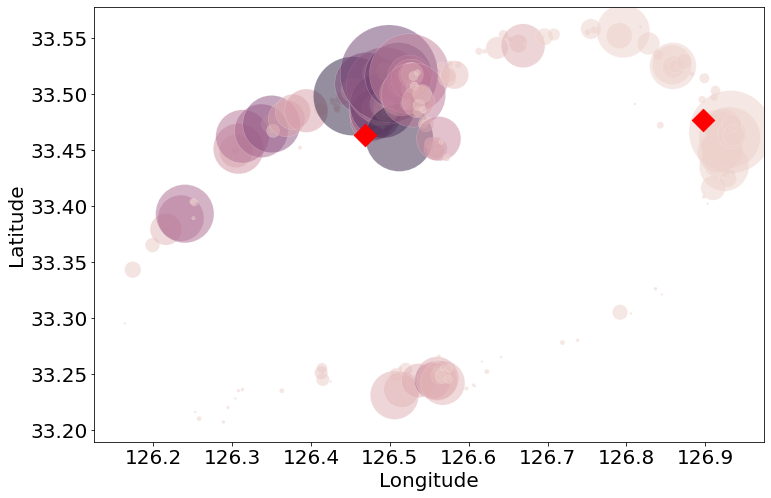

In [32]:
Scatter(TwoSector_data)

In [33]:
TwoSector_data = WholePreprocessing(TwoSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
TwoSector_data['rain'] = TwoSector_data['rain'].astype(str).astype(int)

In [35]:
from sklearn.cluster import KMeans
Four_points = pd.DataFrame().reset_index(drop=True)
Four_points['Xpos'] = FourSector_data['Xpos']
Four_points['Ypos'] = FourSector_data['Ypos']
kmeans = KMeans(n_clusters=4)
kmeans.fit(Four_points)
FourSector_data['Sector'] = kmeans.labels_

In [36]:
FourSector_data

,rent_date,rent_number,rent_station,day,day_name,Xpos,Ypos,Sector
0,2019-04-16,1,EVS_000003,16,Tuesday,126.922,33.470,1
1,2019-04-20,2,EVS_000001,20,Saturday,126.499,33.518,2
2,2019-04-21,2,EVS_000001,21,Sunday,126.499,33.518,2
3,2019-04-24,2,EVS_000003,24,Wednesday,126.922,33.470,1
4,2019-04-25,3,EVS_000003,25,Thursday,126.922,33.470,1
...,...,...,...,...,...,...,...,...
11966,2021-06-11,1,EVS_000260,11,Friday,126.496,33.485,2
11967,2021-06-11,1,EVS_000115,11,Friday,126.484,33.513,2
11968,2021-06-11,1,EVS_000381,11,Friday,126.859,33.525,1
11969,2021-06-11,1,EVS_000339,11,Friday,126.494,33.520,2


In [38]:
FourSector_data

,rent_date,rent_number,rent_station,day,day_name,Xpos,Ypos,Sector
0,2019-04-16,1,EVS_000003,16,Tuesday,126.922,33.470,1
1,2019-04-20,2,EVS_000001,20,Saturday,126.499,33.518,2
2,2019-04-21,2,EVS_000001,21,Sunday,126.499,33.518,2
3,2019-04-24,2,EVS_000003,24,Wednesday,126.922,33.470,1
4,2019-04-25,3,EVS_000003,25,Thursday,126.922,33.470,1
...,...,...,...,...,...,...,...,...
11966,2021-06-11,1,EVS_000260,11,Friday,126.496,33.485,2
11967,2021-06-11,1,EVS_000115,11,Friday,126.484,33.513,2
11968,2021-06-11,1,EVS_000381,11,Friday,126.859,33.525,1
11969,2021-06-11,1,EVS_000339,11,Friday,126.494,33.520,2


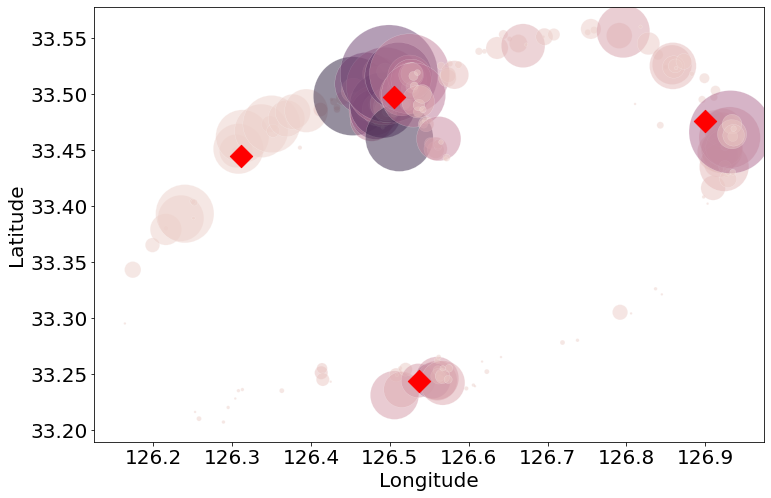

In [39]:
Scatter(FourSector_data)

In [40]:
FourSector_data = WholePreprocessing(FourSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
FourSector_data['rain'] = FourSector_data['rain'].astype(str).astype(int)

In [42]:
One_pred = []
One_error = []
for i in range(208, 717):
    X_data = OneSector_data.drop(['rent_date','rent_number'],axis=1)
    y_data = OneSector_data['rent_number']
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = ExtraTreesRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(float)
    One_error.append(abs(y_test.iloc[0]-pred[0]))
    One_pred.append(pred[0])

In [44]:
OneSector_data['error'] = None
OneSector_data['error'].iloc[208:] = One_error
OneSector_data['error'] = OneSector_data['error'].astype(float)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [87]:
OneSector_data['error']= OneSector_data['error'].fillna(0)

In [45]:
OneSector_pred = OneSector_data.iloc[208:]

In [46]:
OneSector_pred = OneSector_pred.reset_index(drop=True, inplace=False)

In [47]:
OneSector_pred['prediction'] = One_pred

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import scipy.stats as st
reg = lgb.LGBMRegressor()
parameters = {'learning_rate': st.uniform(0.01, 0.1), 
              'max_depth': st.randint(1,10),
              'n_estimators': st.randint(100,1000)}
xlf = RandomizedSearchCV(reg, parameters)

In [49]:
Fir_TwoSector_data = TwoSector_data[TwoSector_data['Sector_0'] == 1]
Sec_TwoSector_data = TwoSector_data[TwoSector_data['Sector_1'] == 1]
Fir_TwoSector_data = Fir_TwoSector_data.reset_index(drop=True, inplace=False)
Sec_TwoSector_data = Sec_TwoSector_data.reset_index(drop=True, inplace=False)

In [50]:
Fir_FourSector_data = FourSector_data[FourSector_data['Sector_0']==1]
Sec_FourSector_data = FourSector_data[FourSector_data['Sector_1']==1]
Thr_FourSector_data = FourSector_data[FourSector_data['Sector_2']==1]
Four_FourSector_data = FourSector_data[FourSector_data['Sector_3']==1]

Fir_FourSector_data = Fir_FourSector_data.reset_index(drop=True, inplace=False)
Sec_FourSector_data = Sec_FourSector_data.reset_index(drop=True, inplace=False)
Thr_FourSector_data = Thr_FourSector_data.reset_index(drop=True, inplace=False)
Four_FourSector_data = Four_FourSector_data.reset_index(drop=True, inplace=False)

In [91]:
FourSector_data

,rent_date,rent_number,day,year,month,T,rain,H,I,weekend,Sector_0,Sector_1,Sector_2,Sector_3,holiday
0,2019-04-16,1,16,2019,4,16.479167,0,45.375000,1.387857,0,0,1,0,0,0
1,2019-04-20,2,20,2019,4,17.125000,0,76.375000,1.622000,1,0,0,1,0,0
2,2019-04-21,2,21,2019,4,18.308333,0,69.625000,1.358000,1,0,0,1,0,0
3,2019-04-24,2,24,2019,4,18.420833,0,86.083333,1.126667,0,0,1,0,0,0
4,2019-04-25,3,25,2019,4,15.937500,0,90.833333,0.678667,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021-06-10,17,10,2021,6,25.462500,4,70.541667,0.567333,0,1,0,0,0,0
1802,2021-06-10,15,10,2021,6,25.462500,4,70.541667,0.567333,0,0,1,0,0,0
1804,2021-06-10,2,10,2021,6,25.462500,4,70.541667,0.567333,0,0,0,0,1,0
1805,2021-06-11,3,11,2021,6,21.937500,6,94.916667,0.444000,1,0,1,0,0,0


In [52]:
from pycaret.regression import *

In [92]:
reg = setup(FourSector_data[:-164], target='rent_number', train_size=0.9)

,Description,Value
0,session_id,704
1,Target,rent_number
2,Original Data,"(1643, 15)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1478, 35)"


In [93]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.8485,88.8590,9.2412,0.7131,0.6619,1.0971,2.1920
lightgbm,Light Gradient Boosting Machine,5.9775,91.3500,9.3635,0.7087,0.6780,1.1257,0.0200
rf,Random Forest Regressor,5.7563,93.3283,9.4935,0.7002,0.6273,1.0135,0.1960
xgboost,Extreme Gradient Boosting,6.1833,100.6400,9.8725,0.6709,0.7058,1.1486,0.1740
et,Extra Trees Regressor,5.9757,103.3908,9.9902,0.6602,0.6263,0.9668,0.1910
gbr,Gradient Boosting Regressor,6.3547,105.5958,10.0651,0.6589,0.7096,1.3014,0.0340
br,Bayesian Ridge,8.6980,157.0190,12.3445,0.4960,0.9000,2.0449,0.0050
ridge,Ridge Regression,8.7305,157.0133,12.3459,0.4957,0.8995,2.0644,0.0050
lr,Linear Regression,8.7432,157.0576,12.3484,0.4955,0.8991,2.0720,0.3410
lar,Least Angle Regression,8.7783,157.9780,12.3919,0.4917,0.9009,2.0739,0.0060


In [94]:
cat = create_model('catboost')
et = create_model('et')
lgbm = create_model('lightgbm')
rf = create_model('rf')
xg = create_model('xgboost')
gbr = create_model('gbr')
ada = create_model('ada')
dt = create_model('dt')
blender = blend_models(estimator_list = [et, xg, rf])
tuned_model = tune_model(blender)
prediction = predict_model(tuned_model, data=Thr_FourSector_data[-42:])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.2829,186.5000,13.6565,0.6643,0.6504,0.9340
1,5.3993,79.6889,8.9269,0.6853,0.6401,1.0926
2,4.5424,56.5816,7.5221,0.7677,0.5317,0.7147
3,5.0316,62.5443,7.9085,0.7726,0.6011,1.0313
4,4.9630,54.6745,7.3942,0.8284,0.6778,1.3257
5,6.1503,110.2178,10.4985,0.6761,0.5826,0.7862
6,5.2072,63.3685,7.9604,0.6990,0.6053,0.9126
7,5.6843,76.9739,8.7735,0.6876,0.6234,0.9642
8,5.6804,102.8267,10.1403,0.7437,0.6555,1.0363
9,6.3373,92.7157,9.6289,0.6234,0.6318,1.0354


In [95]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [96]:
def Plot(x1, xgb_preds,y_test):

    fig, axes = plt.subplots(1,1,figsize=(10,4))
    axes.plot(x1, y_test,'r', label='real_value')
    axes.plot(x1, xgb_preds,label='prediction_value')
    axes.set_xlabel('Date', fontsize=16)
    axes.set_ylabel('Rent Count', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    axes.legend()
    plt.show()

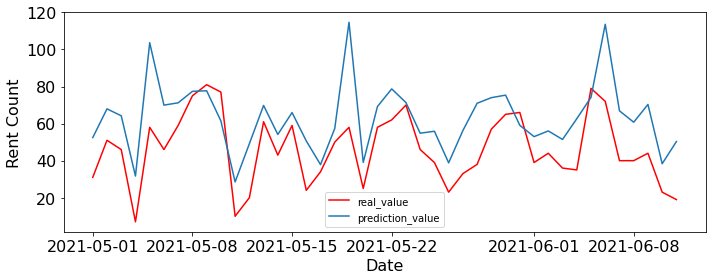

In [97]:
Plot(prediction['rent_date'], prediction['Label'],prediction['rent_number'])

In [98]:
print("R2 Score =", r2_score(prediction['rent_number'], prediction['Label']))
print("MAPE =", MAPE(prediction['rent_number'], prediction['Label']))

R2 Score = -0.33089483477756776
MAPE = 57.14998965150174


In [64]:
from mlens.ensemble import BlendEnsemble
from mlens.ensemble import SuperLearner
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
OneSector_pred

In [ ]:
X_data = OneSector_pred.drop(['rent_date', 'rent_number'], axis=1)
y_data = OneSector_pred['rent_number']
X_train = X_data.iloc[:-42]
y_train = y_data.iloc[:-42]
X_test = X_data.iloc[-42:]
y_test = y_data.iloc[-42:]

In [ ]:
extraR = ExtraTreesRegressor()

In [ ]:
ensemble2 = SuperLearner()
ensemble2.add(ExtraTreesRegressor())
ensemble2.add_meta(xgb.XGBRegressor())
ensemble2.add_meta(RandomForestRegressor())

In [ ]:
ensemble2.fit(X_train, y_train)

In [ ]:
blend_pred = ensemble2.predict(X_test)

In [ ]:
blend_pred

In [ ]:
prediction['result'] = blend_pred

In [ ]:
prediction

In [ ]:
Plot(prediction['rent_date'], prediction['result'],prediction['rent_number'])

In [ ]:
r2_score(prediction['rent_number'], prediction['result'])

In [ ]:
One_result = []
for i in range(42):
    reg = setup(data=OneSector_data[:-42+i], target='rent_number', session_id=0, train_size=0.7)
    cat = create_model('catboost')
    et = create_model('et')
    lgbm = create_model('lightgbm')
    rf = create_model('rf')
    xg = create_model('xgboost')
    blender = blend_models(estimator_list = [et, xg, rf])
    prediction = predict_model(blender, data=OneSector_data[-42+i:-41+i])
    One_result.append(prediction['Label'].values[0])

In [ ]:
result = OneSector_data[-42:-1]

In [ ]:
result['pred'] = One_result